In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
import matplotlib.mlab as mlab
import datetime
import scipy
import scipy.stats as stats
import seaborn as sns

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
# Групуємо клієнтів за країною
df = df[df['Country'] == 'United Kingdom']

# Видаляємо рядки з нульовими значеннями в стовпцях Description і CustomerID
df = df.dropna(subset=['Description', 'CustomerID'])

# Видаляємо негативні записи в кількості
df = df[df['Quantity'] >= 0]

# Перетворюємо Invoice_Date у формат дати і часу
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Додаємо новий стовпець Total_Amount
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']

# Виведемо перші декілька рядків для перевірки
print(df.head())

  InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Total_Amount  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom         15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom         22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34  


In [4]:
import datetime as dt

# allocate the end date of data
last_date = df['InvoiceDate'].max()

# create rfm dataframe group by customer
RFM_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_date - x.max() + datetime.timedelta(days=1)).days,
    'InvoiceNo': lambda x: len(x),  # F (Frequency)
    'Total_Amount': 'sum'  # M (Monetary Value)
}).reset_index()

# set the true name of columns
RFM_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(RFM_data.head(5))

   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12747.0        2        103   4196.01
2     12748.0        1       4596  33719.73
3     12749.0        4        199   4090.88
4     12820.0        3         59    942.34


In [5]:
RFM_data.shape

(3921, 4)

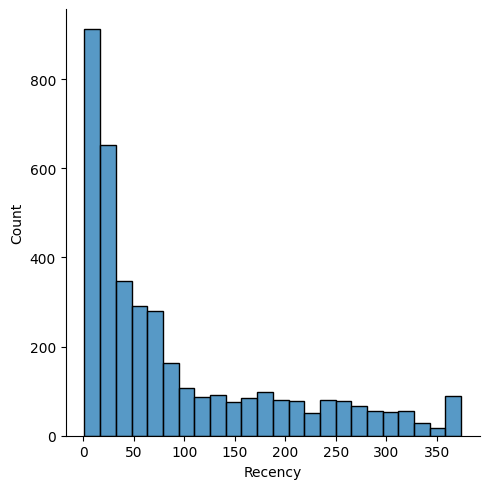

In [11]:
x = RFM_data['Recency']
ax = sns.displot(x)

plt.show()

In [12]:
RFM_data['R'] = RFM_data['Recency'].apply(math.log)
RFM_data['F'] = RFM_data['Frequency'].apply(math.log)
RFM_data['M'] = RFM_data['Monetary'].apply(lambda x: math.log(x + 1))

In [13]:
RFM_data.head(3)

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,1,77183.60,5.786897,0.000000,11.253955
1,12747.0,2,103,4196.01,0.693147,4.634729,8.342128
2,12748.0,1,4596,33719.73,0.000000,8.432942,10.425868


In [14]:
from sklearn.preprocessing import StandardScaler

feature_vector=['R','F','M']
X = RFM_data[feature_vector].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

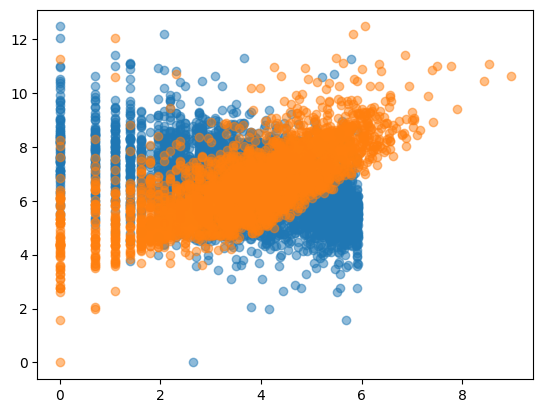

In [15]:
plt.scatter(RFM_data.R,RFM_data.M,alpha=0.5)

plt.scatter(RFM_data.F,RFM_data.M,alpha=0.5)

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import OPTICS
from sklearn.cluster import Birch

C:\Users\ira\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


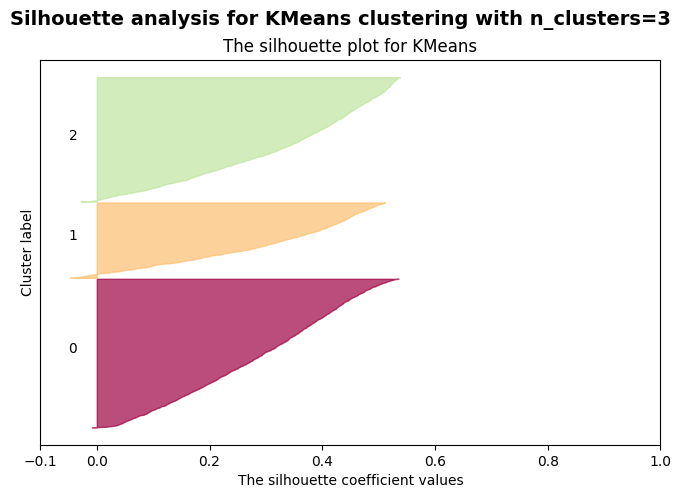

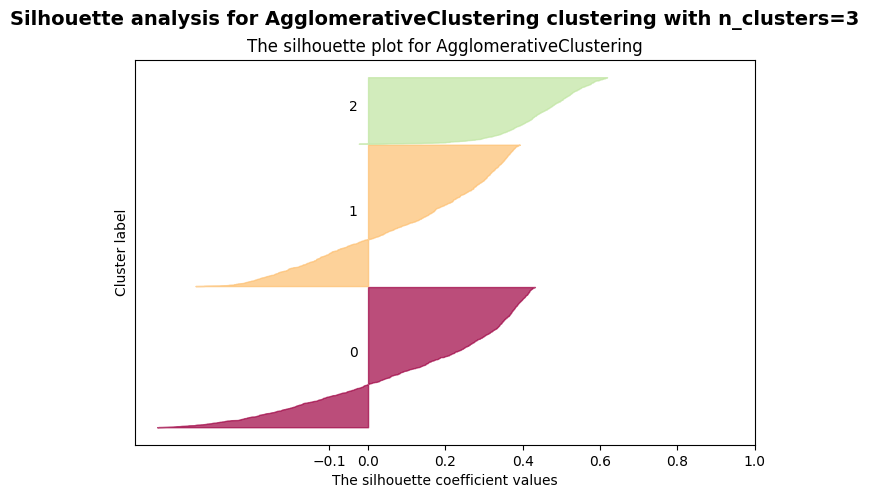

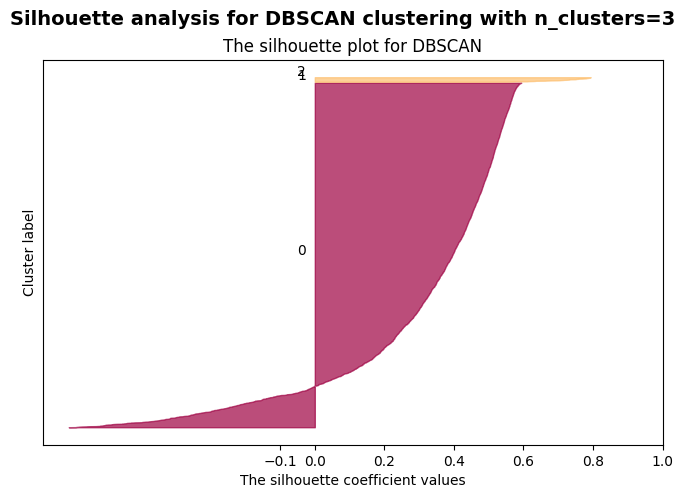

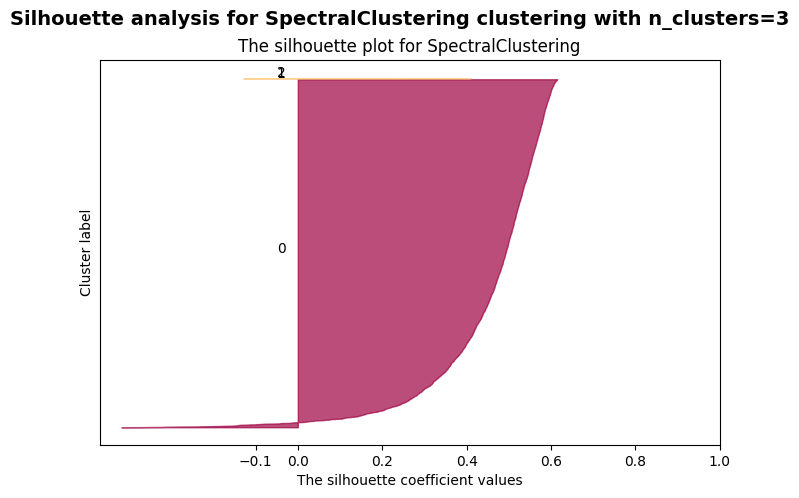

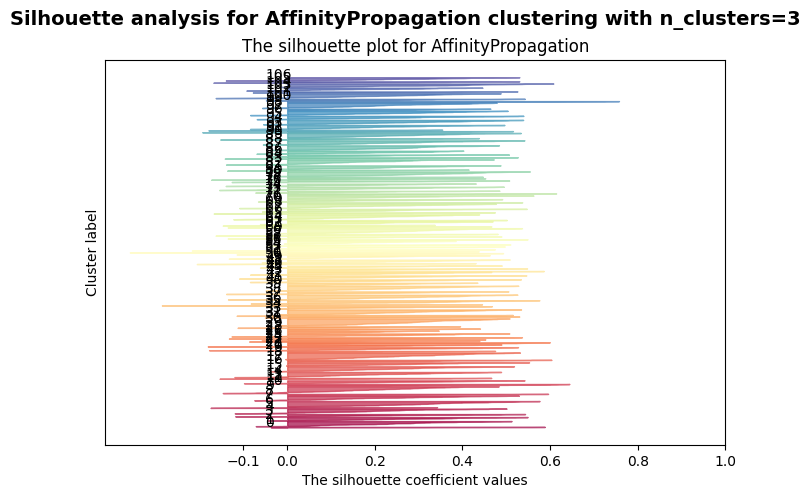

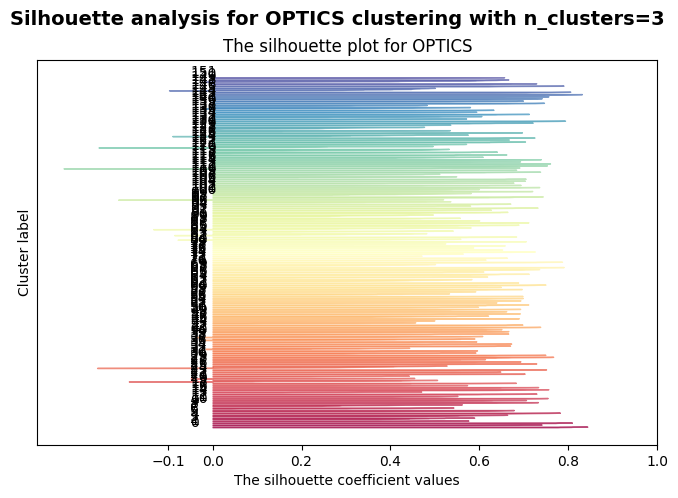

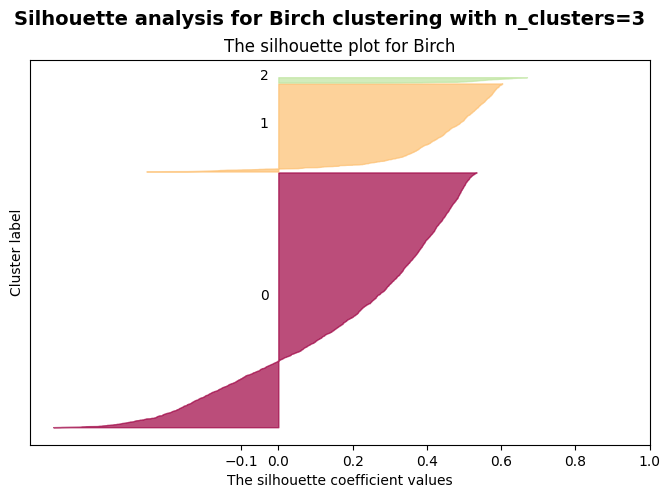

The best algorithm is SpectralClustering with a silhouette score of 0.4562204941448919


In [24]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, AffinityPropagation, OPTICS, Birch
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_scaled is your data after scaling
X = X_scaled

# Algorithms to evaluate
algorithms = {
    'KMeans': KMeans(n_clusters=3),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AffinityPropagation': AffinityPropagation(),
    'OPTICS': OPTICS(),
    'Birch': Birch(n_clusters=3)
}

# Dictionary to store silhouette scores
silhouette_scores = dict()

# Loop over algorithms
for algorithm_name, algorithm in algorithms.items():

    # Creating a figure with two subplots
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(8, 5)

    # Applying the clustering algorithm
    if algorithm_name == 'DBSCAN':
        cluster_labels = algorithm.fit_predict(X)
    else:
        # For other algorithms, the number of clusters is set to 3
        cluster_labels = algorithm.fit_predict(X)

    # Calculating the average silhouette score for the clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores[algorithm_name] = silhouette_avg

    # Calculating silhouette values for individual samples in each cluster
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10

    # Looping through clusters to create silhouette plots
    for i in range(np.unique(cluster_labels).size):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Assigning colors based on clusters for the silhouette plot
        color = plt.cm.Spectral(float(i) / np.unique(cluster_labels).size)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting titles and labels for the silhouette plot
    ax.set_title(f'The silhouette plot for {algorithm_name}')
    ax.set_xlabel('The silhouette coefficient values')
    ax.set_ylabel('Cluster label')
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Adding a main title to the figure
    plt.suptitle(f'Silhouette analysis for {algorithm_name} clustering with n_clusters=3',
                 fontsize=14, fontweight='bold')

    # Displaying the figure
    plt.show()

# Finding the algorithm with the highest silhouette score
best_algorithm = max(silhouette_scores, key=silhouette_scores.get)
print(f"The best algorithm is {best_algorithm} with a silhouette score of {silhouette_scores[best_algorithm]}")


C:\Users\ira\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for KMeans: 0.30401212719429843


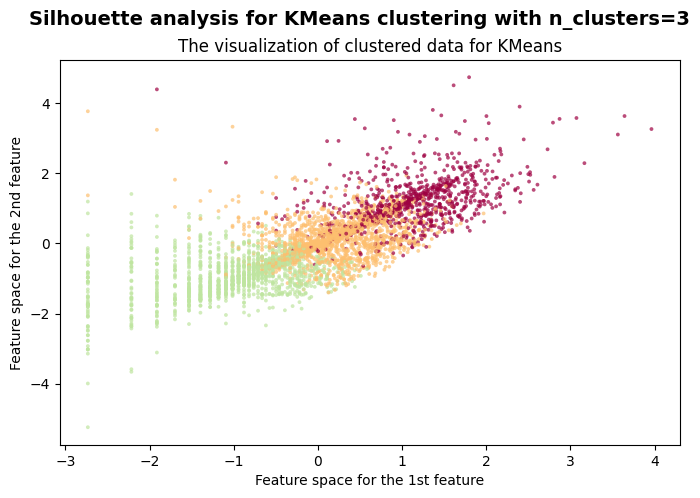

Silhouette score for AgglomerativeClustering: 0.17598542884650348


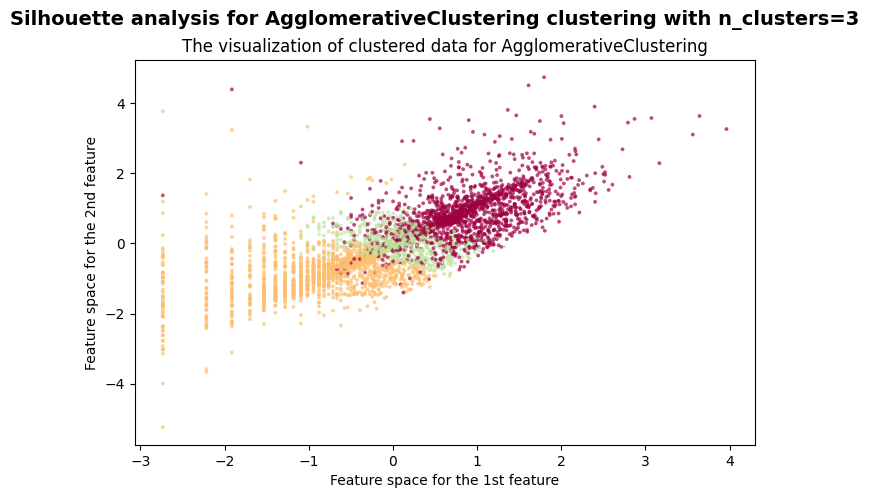

Silhouette score for DBSCAN: -0.13967000834025745


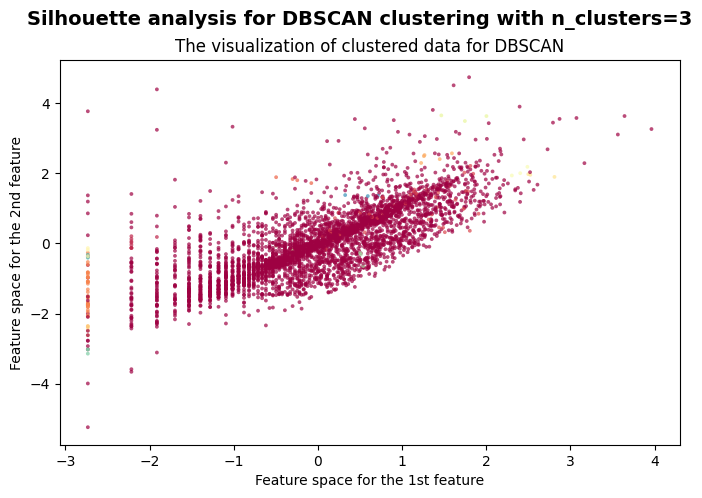

Silhouette score for SpectralClustering: 0.47334275340436543


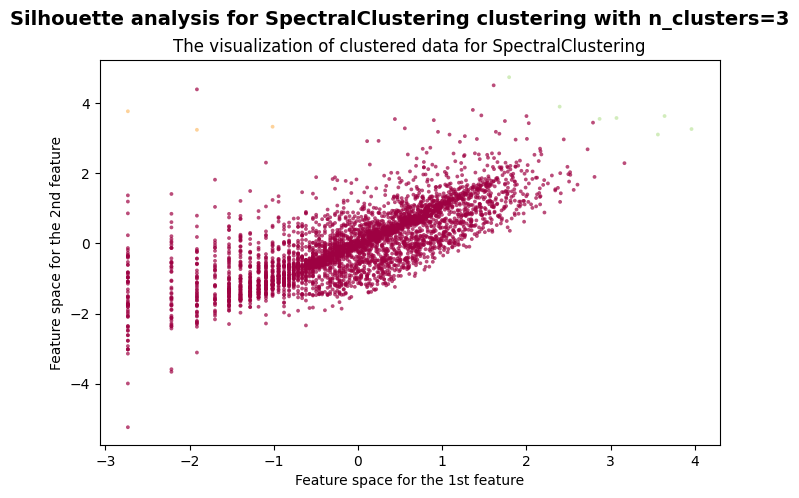

Silhouette score for AffinityPropagation: 0.23882436466817375


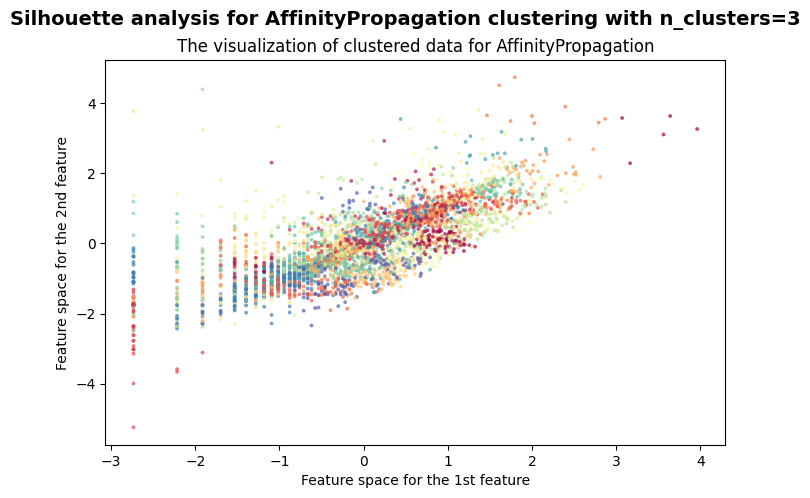

Silhouette score for OPTICS: -0.18719593235664117


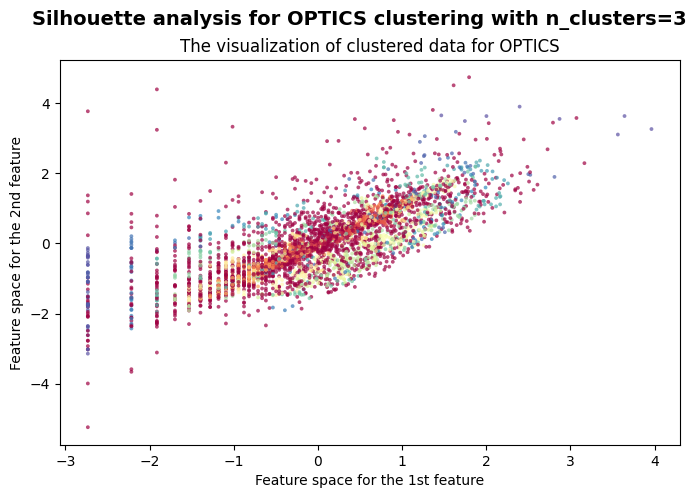

Silhouette score for Birch: 0.30905520762510924


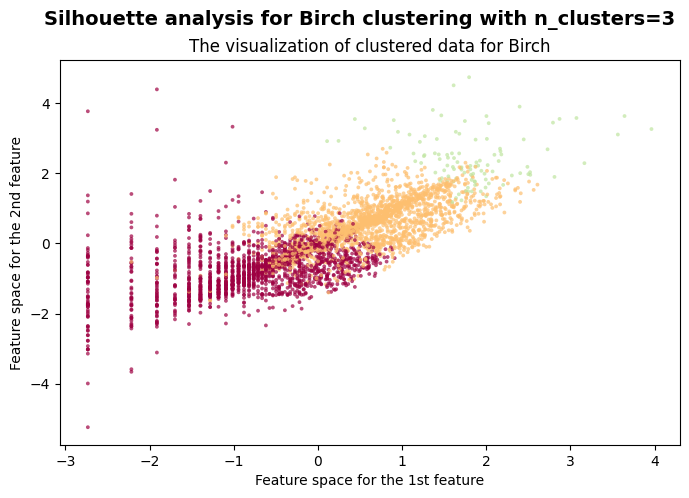


The best algorithm is SpectralClustering with a silhouette score of 0.47334275340436543


In [30]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, AffinityPropagation, OPTICS, Birch
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_scaled is your data after scaling
X = X_scaled

# Algorithms to evaluate
algorithms = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=1/3, min_samples=3),
    'SpectralClustering': SpectralClustering(n_clusters=3, random_state=42, n_components=6),
    'AffinityPropagation': AffinityPropagation(random_state=42),
    'OPTICS': OPTICS(min_samples=3),
    'Birch': Birch(n_clusters=3, threshold=1/3)
}

# Dictionary to store silhouette scores
silhouette_scores = dict()

# Loop over algorithms
for algorithm_name, algorithm in algorithms.items():

    # Creating a figure with two subplots
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(8, 5)

    # Applying the clustering algorithm
    cluster_labels = algorithm.fit_predict(X)

    # Calculating the average silhouette score for the clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores[algorithm_name] = silhouette_avg

    # Scatter plot to visualize the clustered data in feature space
    colors = plt.cm.Spectral(cluster_labels.astype(float) / np.unique(cluster_labels).size)
    ax.scatter(X[:, 1], X[:, 2], marker='.', s=30, lw=0, alpha=0.7,
               c=colors, edgecolor='k')

    # Setting titles and labels for the scatter plot
    ax.set_title(f'The visualization of clustered data for {algorithm_name}')
    ax.set_xlabel('Feature space for the 1st feature')
    ax.set_ylabel('Feature space for the 2nd feature')

    # Adding a main title to the figure
    plt.suptitle(f'Silhouette analysis for {algorithm_name} clustering with n_clusters=3',
                 fontsize=14, fontweight='bold')

    # Displaying the silhouette score
    print(f"Silhouette score for {algorithm_name}: {silhouette_avg}")

    # Displaying the figure
    plt.show()

# Finding the algorithm with the highest silhouette score
best_algorithm = max(silhouette_scores, key=silhouette_scores.get)
best_silhouette_score = silhouette_scores[best_algorithm]
print(f"\nThe best algorithm is {best_algorithm} with a silhouette score of {best_silhouette_score}")
